In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Preprocessing
from pandas import read_csv
from datetime import datetime

def str2time(time_str):
    return datetime.strptime(time_str, '%Y %m %d %H')

def str3time(time_str):
    return datetime.strptime(time_str, '%Y %m')

In [3]:
## combine year, month, day, hour into datetime
Shanghai = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ShanghaiPM20100101_20151231.csv", parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=str2time)

In [4]:
dataset = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv",  parse_dates=[['year', 'month']], index_col=0, date_parser=str3time)
#dataset
dataset.dropna(axis=0,subset = ["PM_US Post"], how="any",inplace=True)
dataset.groupby(['year_month']).size()

year_month
2012-05-01      1
2012-06-01    264
2012-07-01    729
2012-08-01    608
2012-09-01    693
2012-10-01    731
2012-11-01    672
2012-12-01    711
2013-01-01    718
2013-02-01    666
2013-03-01    409
2013-04-01    257
2013-05-01    744
2013-06-01    718
2013-07-01    624
2013-08-01    743
2013-09-01    706
2013-10-01    488
2013-11-01    577
2013-12-01    717
2014-01-01    742
2014-02-01    671
2014-03-01    742
2014-04-01    719
2014-05-01    740
2014-06-01    720
2014-07-01    563
2014-08-01    741
2014-09-01    706
2014-10-01    689
2014-11-01    706
2014-12-01    736
2015-01-01    741
2015-02-01    670
2015-03-01    741
2015-04-01    717
2015-05-01    738
2015-06-01    717
2015-07-01    694
2015-08-01    731
2015-09-01    712
2015-10-01    742
2015-11-01    718
2015-12-01    728
dtype: int64

In [5]:
Shanghai

,No,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year_month_day_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
2010-01-01 01:00:00,2,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2010-01-01 02:00:00,3,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
2010-01-01 03:00:00,4,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
2010-01-01 04:00:00,5,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
2015-12-31 20:00:00,52581,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
2015-12-31 21:00:00,52582,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0


In [6]:
#Delet non-useful data
Shanghai.drop(['No', 'season', 'PM_Jingan', 'PM_Xuhui', 'DEWP', 'HUMI','PRES','TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)

Shanghai

,PM_US Post
year_month_day_hour,
2010-01-01 00:00:00,NaN
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
...,...
2015-12-31 19:00:00,82.0
2015-12-31 20:00:00,93.0
2015-12-31 21:00:00,90.0


In [7]:
## rename columns
Shanghai.index.name = 'date'

In [8]:
Shanghai.dropna(axis=0, how="any",inplace=True)

In [9]:
Shanghai.index = pd.to_datetime(Shanghai.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shanghai = Shanghai.set_index(Shanghai.index).asfreq('H')

#print(by_hour.index)

In [10]:
df = Shanghai[(Shanghai.index >=pd.to_datetime('20140328000000')) & (Shanghai.index <= pd.to_datetime('20140411230000'))]

len(df)

360

In [11]:
df = df.set_index(df.index).asfreq('H')

df = df.fillna(method='ffill')
len(df)

360

In [12]:
################################################################################################################################

In [13]:
##sARIMA Forecast

In [14]:
################################################################################################################################

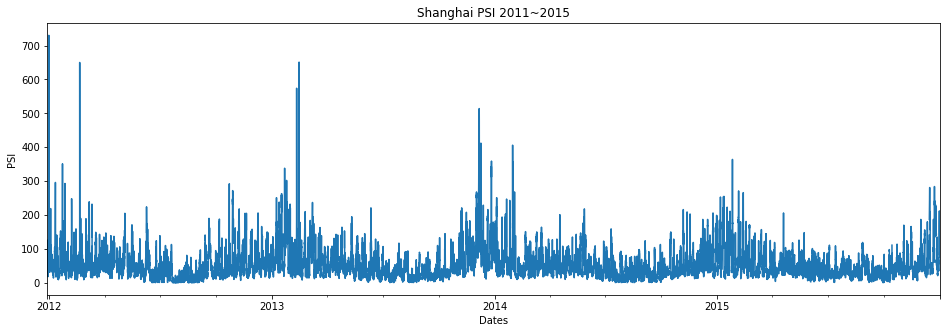

In [15]:
ax = Shanghai['PM_US Post'].plot(figsize = (16,5), title = "Shanghai PSI 2011~2015")
ax.set(xlabel='Dates', ylabel='PSI');

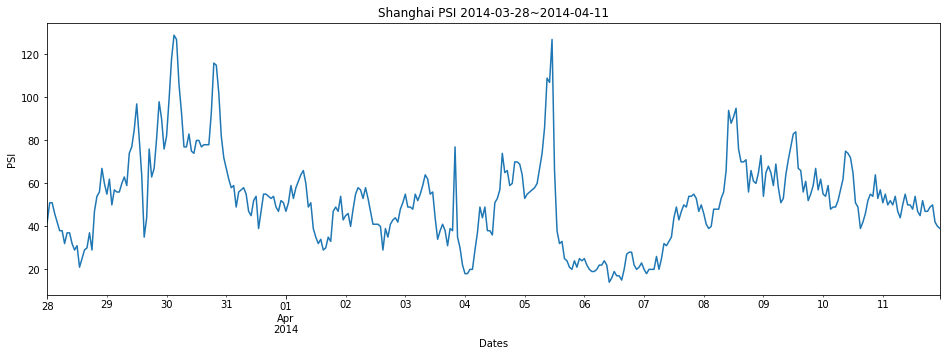

In [16]:
ax = df['PM_US Post'].plot(figsize = (16,5), title = "Shanghai PSI 2014-03-28~2014-04-11")
ax.set(xlabel='Dates', ylabel='PSI');

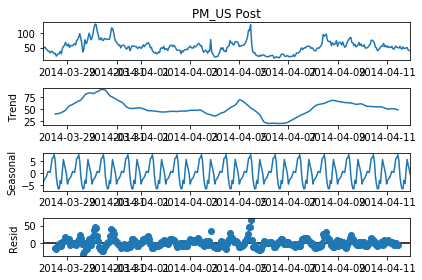

In [17]:
a = seasonal_decompose(df["PM_US Post"], model = "add")
a.plot();

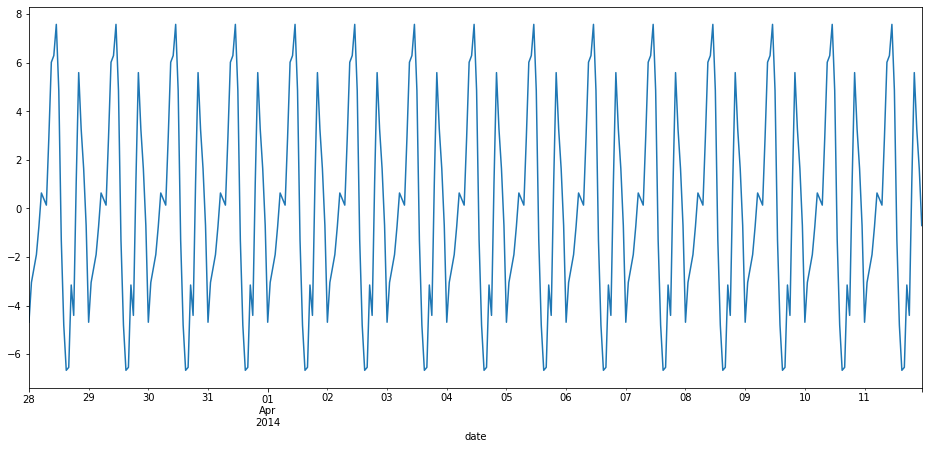

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

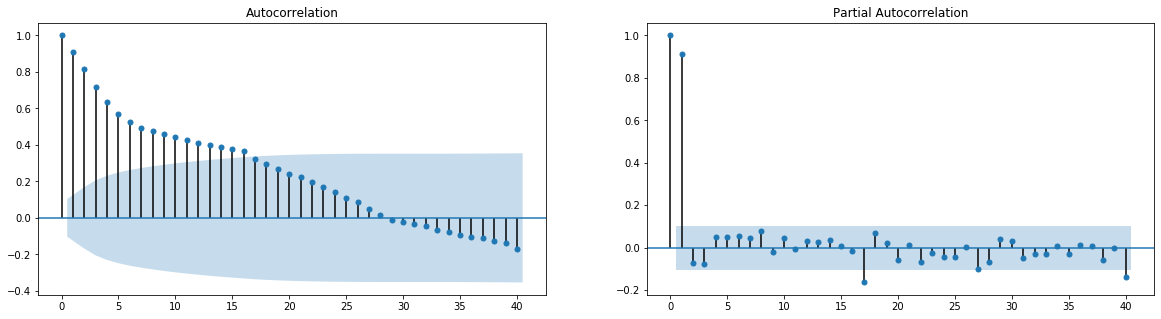

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(df['PM_US Post'], lags=40, ax=axes[1])
plt.show()

In [20]:
import statsmodels.api as sm

res = sm.tsa.stattools.arma_order_select_ic(df['PM_US Post'], ic=['aic']) 
print (res.aic_min_order)

(1, 2)


In [21]:
#auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 3, max_q = 3, m=24,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 24) (constant=True); AIC=3067.415, BIC=3078.866, Time=2.434 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=3189.349, BIC=3196.984, Time=0.070 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 24) (constant=True); AIC=2543.121, BIC=2558.390, Time=2.914 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 24) (constant=True); AIC=2790.899, BIC=2806.168, Time=5.613 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=False); AIC=3187.516, BIC=3191.333, Time=0.107 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=2643.356, BIC=2654.807, Time=0.610 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 24) (constant=True); AIC=2511.869, BIC=2530.955, Time=12.726 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 24) (constant=True); AIC=2471.464, BIC=2494.367, Time=40.515 seconds
Nea

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1230.013
Date:                              Sat, 25 Apr 2020   AIC                           2470.026
Time:                                      01:22:20   BIC                           2489.111
Sample:                                           0   HQIC                          2477.634
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0528      0.123     -0.429      0.668      -0.294       0.188
ar.L1          0.9127      0.020     46.266      0.000       0.874       0.951
ar.S.L24      -0.0017      0.077     -0.022      0.982      -0.153       0.150
ma.S.L24      -0.9228      0.128     -7.195      0.000      -1.174      -0.671
sigma2        77.4117      7.040     10.997      0.000      63.614      91.209
===================================================================================
Ljung-Box (Q):                       29.84   Jarque-Bera (JB):               485.37
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# the best arima model chosen by auto_arima() is SARIMAX((1, 0, 0)x(1, 1, [1], 24)

# split the data into train and test set
train_data = df[:len(df)-72]
test_data = df[len(df)-72:]
arima_model = SARIMAX(train_data['PM_US Post'], order = (1, 0, 0), seasonal_order = (1, 1, [1], 24))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PM_US Post   No. Observations:                  288
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood                -986.904
Date:                              Sat, 25 Apr 2020   AIC                           1981.807
Time:                                      01:22:25   BIC                           1996.111
Sample:                                  03-28-2014   HQIC                          1987.555
                                       - 04-08-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9217      0.022     41.850      0.000       0.879       0.965
ar.S.L24      -0.0285      0.093     -0.308      0.758      -0.210       0.153
ma.S.L24      -0.9025      0.143     -6.290      0.000      -1.184      -0.621
sigma2        88.4950      8.396     10.540      0.000      72.040     104.951
===================================================================================
Ljung-Box (Q):                       29.08   Jarque-Bera (JB):               374.33
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.50
Prob(H) (two-sided):                  0.49   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2014-04-09 00:00:00    68.660045
2014-04-09 01:00:00    67.737476
2014-04-09 02:00:00    66.421500
2014-04-09 03:00:00    65.954409
2014-04-09 04:00:00    66.361399
                         ...    
2014-04-11 19:00:00    52.485074
2014-04-11 20:00:00    56.920591
2014-04-11 21:00:00    52.561610
2014-04-11 22:00:00    52.509058
2014-04-11 23:00:00    49.977050
Freq: H, Name: ARIMA Predictions, Length: 72, dtype: float64

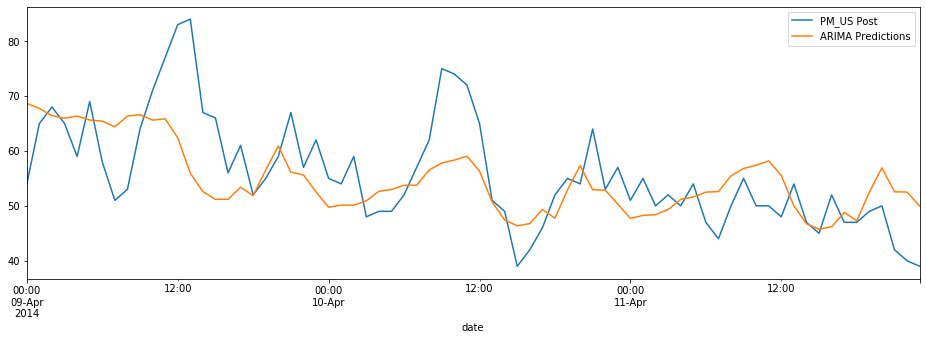

In [24]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [25]:
arima_rmse_error = rmse(test_data['PM_US Post'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 69.00875991792363
RMSE Error: 8.307151131279822
Mean: 52.105555555555554


In [26]:
test_data['ARIMA_Predictions'] = arima_pred

In [27]:
################################################################################################################################

In [28]:
##LSTM Forecast

In [29]:
################################################################################################################################

In [30]:
#df

In [31]:
# Scale train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [32]:
# Before creating LSTM model, create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 1
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [33]:
lstm_model.fit_generator(generator,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
287/287 [==============================] - 1s 4ms/step - loss: 0.0491
Epoch 2/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0173
Epoch 3/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 4/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 5/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 6/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 7/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 8/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 9/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 10/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 11/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 12/50
287/287 [==============================] - 1s 2

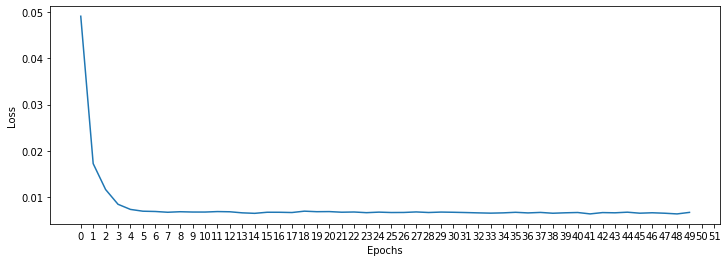

In [34]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,170,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [35]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [36]:
lstm_predictions_scaled

[array([0.49587157], dtype=float32),
 array([0.47987995], dtype=float32),
 array([0.46500853], dtype=float32),
 array([0.4511971], dtype=float32),
 array([0.43838584], dtype=float32),
 array([0.42651594], dtype=float32),
 array([0.41552988], dtype=float32),
 array([0.40537187], dtype=float32),
 array([0.39598808], dtype=float32),
 array([0.3873268], dtype=float32),
 array([0.3793387], dtype=float32),
 array([0.37197676], dtype=float32),
 array([0.36519647], dtype=float32),
 array([0.35895565], dtype=float32),
 array([0.35321468], dtype=float32),
 array([0.34793624], dtype=float32),
 array([0.34308547], dtype=float32),
 array([0.33862963], dtype=float32),
 array([0.33453825], dtype=float32),
 array([0.33078295], dtype=float32),
 array([0.3273373], dtype=float32),
 array([0.32417676], dtype=float32),
 array([0.32127857], dtype=float32),
 array([0.31862167], dtype=float32),
 array([0.31618658], dtype=float32),
 array([0.31395525], dtype=float32),
 array([0.31191105], dtype=float32),
 arra

In [37]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[71.02523097],
       [69.18619373],
       [67.47598061],
       [65.88766509],
       [64.41437209],
       [63.04933274],
       [61.78593585],
       [60.61776558],
       [59.53862885],
       [58.54258278],
       [57.62395182],
       [56.77732775],
       [55.99759364],
       [55.27989992],
       [54.61968833],
       [54.01266792],
       [53.4548288 ],
       [52.94240782],
       [52.47189888],
       [52.04003924],
       [51.6437889 ],
       [51.28032723],
       [50.94703579],
       [50.6414915 ],
       [50.36145636],
       [50.10485345],
       [49.86977035],
       [49.65444201],
       [49.45724735],
       [49.27668178],
       [49.11137098],
       [48.96004686],
       [48.82154071],
       [48.69477981],
       [48.57878053],
       [48.47263807],
       [48.37552646],
       [48.28668141],
       [48.2054072 ],
       [48.13106292],
       [48.06305909],
       [48.00086105],
       [47.94397527],
       [47.89195278],
       [47.84437546],
       [47

In [38]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,PM_US Post,ARIMA_Predictions,LSTM_Predictions
date,,,
2014-04-09 00:00:00,54.0,68.660045,71.025231
2014-04-09 01:00:00,65.0,67.737476,69.186194
2014-04-09 02:00:00,68.0,66.421500,67.475981
2014-04-09 03:00:00,65.0,65.954409,65.887665
2014-04-09 04:00:00,59.0,66.361399,64.414372
...,...,...,...
2014-04-11 19:00:00,49.0,52.485074,47.401288
2014-04-11 20:00:00,50.0,56.920591,47.395750
2014-04-11 21:00:00,42.0,52.561610,47.390688


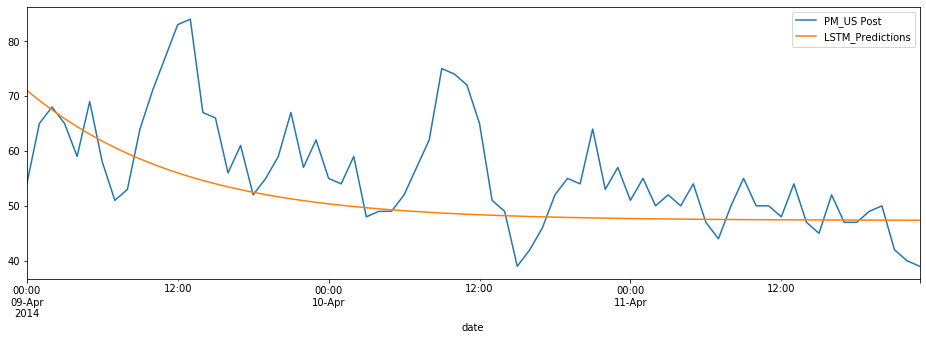

In [39]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [40]:
lstm_rmse_error = rmse(test_data['PM_US Post'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 99.27999287295897
RMSE Error: 9.963934608023026
Mean: 52.105555555555554


In [41]:
################################################################################################################################

In [42]:
##Prophet Forecast

In [43]:
################################################################################################################################

In [44]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-72]
test_data_pr = df_pr.iloc[len(df)-72:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72,freq='H')
prophet_pred = m.predict(future)
prophet_pred.tail()

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2014-04-11 19:00:00,39.847951,14.373541,68.994240,38.714548,40.881042,2.779536,2.779536,2.779536,2.779536,2.779536,2.779536,0.0,0.0,0.0,42.627487
356,2014-04-11 20:00:00,39.813712,17.737604,71.219234,38.662281,40.870962,5.273791,5.273791,5.273791,5.273791,5.273791,5.273791,0.0,0.0,0.0,45.087503
357,2014-04-11 21:00:00,39.779472,19.290082,72.397487,38.600968,40.859434,5.460741,5.460741,5.460741,5.460741,5.460741,5.460741,0.0,0.0,0.0,45.240214
358,2014-04-11 22:00:00,39.745233,16.578306,70.283781,38.544230,40.843736,3.116297,3.116297,3.116297,3.116297,3.116297,3.116297,0.0,0.0,0.0,42.861530
359,2014-04-11 23:00:00,39.710993,11.305997,66.940235,38.489968,40.829821,-0.612411,-0.612411,-0.612411,-0.612411,-0.612411,-0.612411,0.0,0.0,0.0,39.098583


In [45]:
#df_pr

In [46]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-72:]['ds'], "Pred" : prophet_pred[-72:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "H"
prophet_pred

,Pred
Date,
2014-04-09 00:00:00,38.366459
2014-04-09 01:00:00,37.253845
2014-04-09 02:00:00,38.335714
2014-04-09 03:00:00,40.387041
2014-04-09 04:00:00,41.922370
...,...
2014-04-11 19:00:00,42.627487
2014-04-11 20:00:00,45.087503
2014-04-11 21:00:00,45.240214


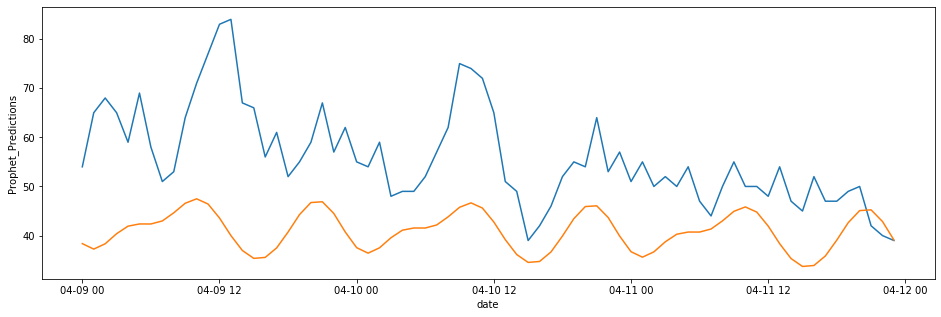

In [47]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["PM_US Post"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [48]:
prophet_rmse_error = rmse(test_data['PM_US Post'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 308.19247207463894
RMSE Error: 17.555411475514862
Mean: 52.105555555555554


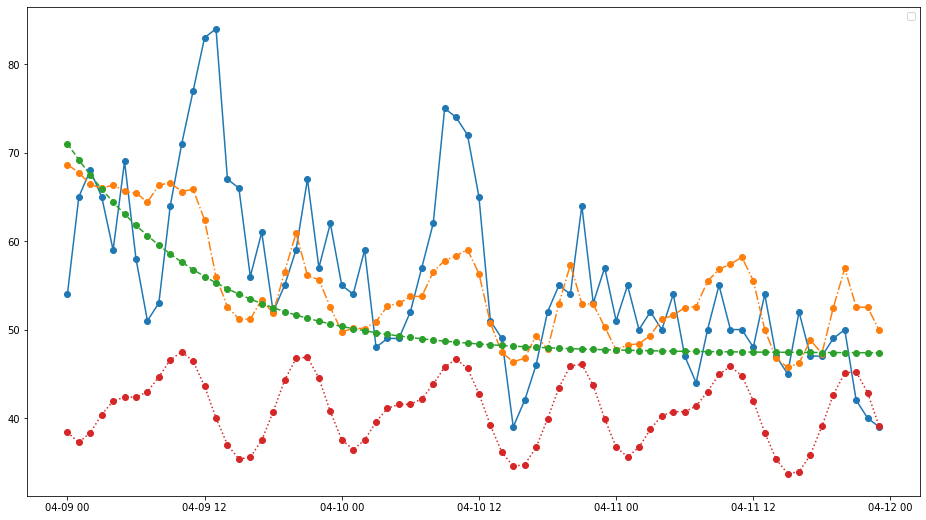

In [49]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["PM_US Post"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [50]:
print(f"Mean: {test_data['PM_US Post'].mean()}")
errors

Mean: 55.888888888888886


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.307151,69.008760
1,LSTM,9.963935,99.279993
2,Prophet,17.555411,308.192472


In [51]:
test_data.head(50)

,PM_US Post,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
date,,,,
2014-04-09 00:00:00,54.0,68.660045,71.025231,38.366459
2014-04-09 01:00:00,65.0,67.737476,69.186194,37.253845
2014-04-09 02:00:00,68.0,66.421500,67.475981,38.335714
2014-04-09 03:00:00,65.0,65.954409,65.887665,40.387041
2014-04-09 04:00:00,59.0,66.361399,64.414372,41.922370
2014-04-09 05:00:00,69.0,65.618835,63.049333,42.368861
2014-04-09 06:00:00,58.0,65.436639,61.785936,42.364519
2014-04-09 07:00:00,51.0,64.398215,60.617766,42.985907
2014-04-09 08:00:00,53.0,66.334674,59.538629,44.637092
